<a href="https://colab.research.google.com/github/ztjohnson23/MAT494/blob/main/hw_3-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from sklearn import svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

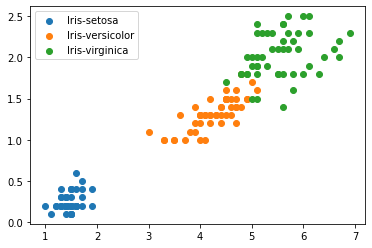

In [61]:
# Plot data
iris = pd.read_csv('Iris.csv')

speciesgroups = iris.groupby('Species')
for name, group in speciesgroups:
    plt.scatter(group['PetalLengthCm'], group['PetalWidthCm'], label=name)
plt.legend()
plt.show()

The data here is in three groups, but in order to demonstrate a simple SVM with only 2 classes, I will combine the versicolor and virginica classifications.

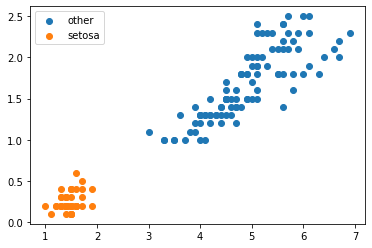

In [62]:
# Combine versicolor and virginica
iris['Species2'] = ['setosa' if species=='Iris-setosa' else 'other' for species in iris['Species']]

speciesgroups = iris.groupby('Species2')
for name, group in speciesgroups:
    plt.scatter(group['PetalLengthCm'], group['PetalWidthCm'], label=name)
plt.legend()
plt.show()

In [63]:
# Build SVM
svmachine = svm.SVC(kernel='linear')
svmachine.fit(iris[['PetalLengthCm','PetalWidthCm']],iris['Species2'])
coefs = svmachine.coef_[0]
intercept = svmachine.intercept_[0]
a = -coefs[0]/coefs[1]
b = -intercept/coefs[1]
print(a,'\n',b)

-1.5714285714285714 
 4.68571424484253


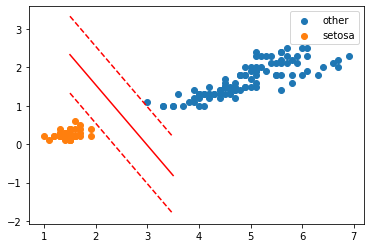

In [67]:
# Plot new margins
x = np.linspace(1.5,3.5)
y = a*x + b
plt.plot(x,y,color = 'red')
plt.plot(x,y+1,color = 'red', linestyle='--')
plt.plot(x,y-1,color = 'red', linestyle='--')

speciesgroups = iris.groupby('Species2')
for name, group in speciesgroups:
    plt.scatter(group['PetalLengthCm'], group['PetalWidthCm'], label=name)

plt.legend()
plt.show()

We can see from the plot that the line created by the SVM appears to maximize the margin distance between the clusters. The two clusters are also equidistant from the hyperplane, so that $w^Tx-b=\pm1$ is satisfied by the hyperplane margins.